<a href="https://colab.research.google.com/github/krmonline/AnomalyDetection/blob/master/Heart_disease_uci_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data set https://www.kaggle.com/ronitf/heart-disease-uci?select=heart.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow.keras as keras
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/datasets_33180_43520_heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
from sklearn.preprocessing import minmax_scale

In [4]:
n = minmax_scale(df)
df2 = pd.DataFrame(n)
df2[13] = df2[13].astype('int32')
df2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.00,0.333333,1
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.00,0.666667,1
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.00,0.666667,1
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.00,0.666667,1
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.00,0.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0.0,0.000000,0.433962,0.262557,0.0,0.5,0.396947,1.0,0.032258,0.5,0.00,1.000000,0
299,0.333333,1.0,1.000000,0.150943,0.315068,0.0,0.5,0.465649,0.0,0.193548,0.5,0.00,1.000000,0
300,0.812500,1.0,0.000000,0.471698,0.152968,1.0,0.5,0.534351,0.0,0.548387,0.5,0.50,1.000000,0
301,0.583333,1.0,0.000000,0.339623,0.011416,0.0,0.5,0.335878,1.0,0.193548,0.5,0.25,1.000000,0


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
y = keras.utils.to_categorical(df2[13].values)

![Split Data](https://raw.githubusercontent.com/krmonline/AnomalyDetection/master/images/AnomalyDetection1.png)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop([13],axis=1).values,y, test_size=0.33)
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test, test_size=0.5)

In [78]:
model = keras.Sequential([
  keras.layers.Input(13),
  keras.layers.Dense(64,activation='sigmoid'),
  keras.layers.Dense(32,activation='sigmoid'),
  keras.layers.Dense(2,activation='softmax')
])
model.compile(optimizer='adam',metrics=['accuracy'],loss='CategoricalCrossentropy')
acc = []
val_acc = []
loss = []
val_loss = []

In [79]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 64)                896       
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 2)                 66        
Total params: 3,042
Trainable params: 3,042
Non-trainable params: 0
_________________________________________________________________


In [80]:
from keras.utils.vis_utils import plot_model

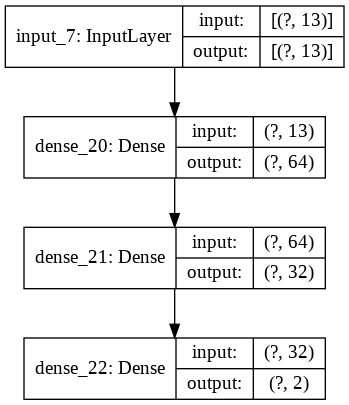

In [81]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [82]:
!pip install ann_visualizer

In [130]:
from ann_visualizer.visualize import ann_viz;
from keras.models import model_from_json

In [131]:
ann_viz(model, title="Artificial Neural network - Model Visualization")

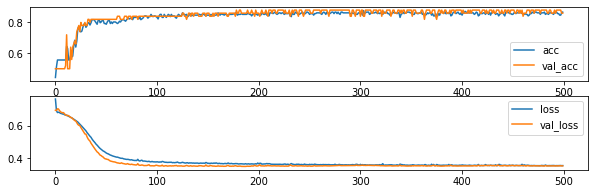

In [132]:
history = model.fit(X_train,y_train,epochs=500,validation_data=(X_val,y_val),verbose=0)
acc = acc + history.history['accuracy']
val_acc = val_acc + history.history['val_accuracy']
loss = loss + history.history['loss']
val_loss = val_loss + history.history['val_loss']

f,ax = plt.subplots(2,1,figsize=(10, 3))
ax[0].plot(acc)
ax[0].plot(val_acc)
ax[0].legend(['acc','val_acc'])

ax[1].plot(loss)
ax[1].plot(val_loss)
ax[1].legend(['loss','val_loss'])

In [133]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [146]:
pred = model.predict_classes(X_test)
pred = keras.utils.to_categorical(pred)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        23
           1       0.83      0.89      0.86        27

   micro avg       0.84      0.84      0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.84      0.84      0.84        50
 samples avg       0.84      0.84      0.84        50



In [145]:
n = 0
testData = X_test[n]
display(pd.DataFrame(testData).T)
print("Predict = ",model.predict_classes(np.array([testData]))[0])
print("Real = ", 0 if y_test[n][0] == 1 else  1)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.291667,1.0,0.0,0.150943,0.194064,0.0,0.5,0.687023,0.0,0.0,1.0,0.0,1.0


Predict =  1
Real =  1


#For Other model Prediction Heart disease
https://www.kaggle.com/vbmokin/heart-disease-best-from-20-models-no-overfit